In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [3]:
!pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 32.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.18.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 6.7.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.


In [4]:
!pip install prophet

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = pd.read_csv(data_url)
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [7]:
df.shape

(108, 2)

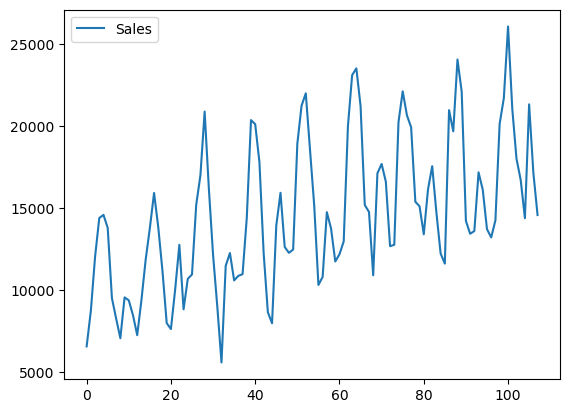

In [8]:
df.plot()
plt.show()

In [9]:
df.columns = ['ds','y']

In [10]:
# convert the date to date time
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [12]:
model = Prophet()

In [13]:
model.fit(df)

03:46:00 - cmdstanpy - INFO - Chain [1] start processing
03:46:00 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.337005  12812.238136  15933.723927
1 1968-02-01  14932.023251  13311.714302  16597.672897
2 1968-03-01  20887.870156  19247.951745  22422.011828
3 1968-04-01  22910.235300  21283.967863  24453.800101
4 1968-05-01  24205.434283  22744.159075  25796.158128


In [15]:
future['ds']

0    1968-01-01
1    1968-02-01
2    1968-03-01
3    1968-04-01
4    1968-05-01
5    1968-06-01
6    1968-07-01
7    1968-08-01
8    1968-09-01
9    1968-10-01
10   1968-11-01
11   1968-12-01
Name: ds, dtype: datetime64[ns]

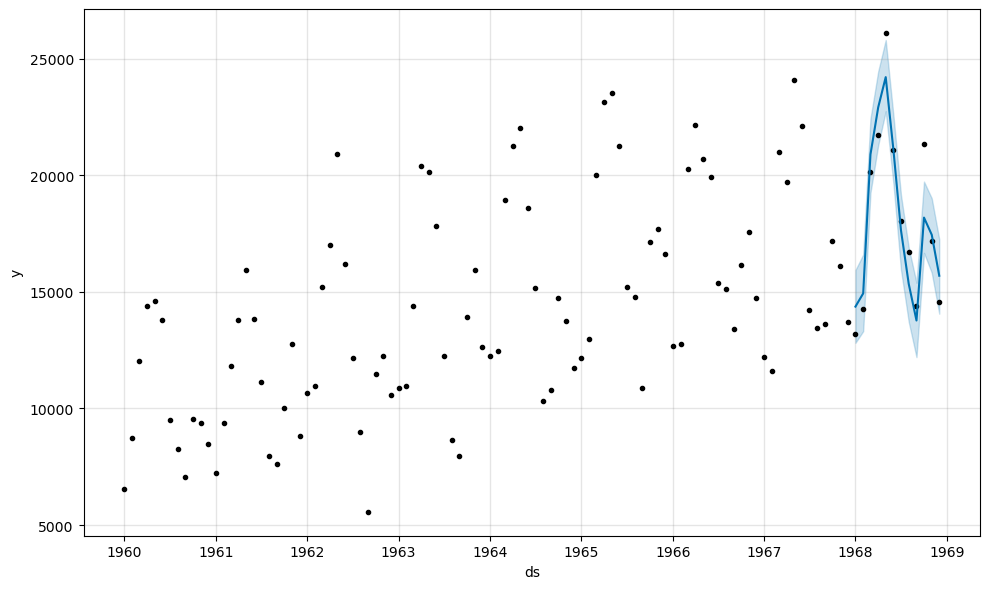

In [16]:
# plot forecast (IN SAMPLE)
model.plot(forecast)
plt.show()

In [17]:
# OUT SAMPLE ForeCast
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15427.590833  13840.418475  16917.294633
1 1969-02-01  16201.186864  14771.646887  17851.042344
2 1969-03-01  21403.447706  19894.040357  22894.671083
3 1969-04-01  23529.317569  21946.008714  25042.527993
4 1969-05-01  25037.663724  23451.904402  26530.110091


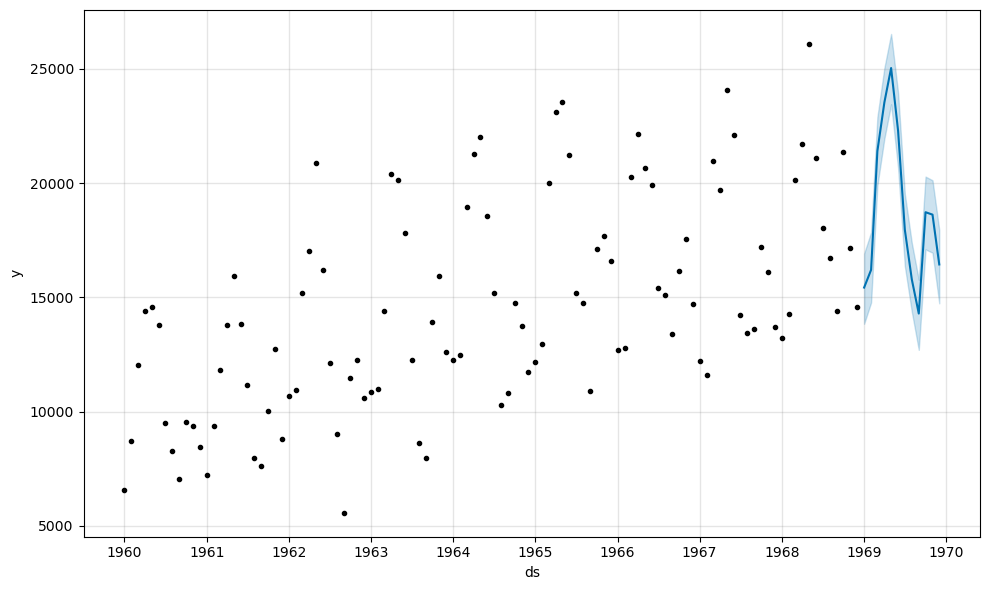

In [18]:
# plot forecast
model.plot(forecast)
plt.show()

MAE: 1376.962


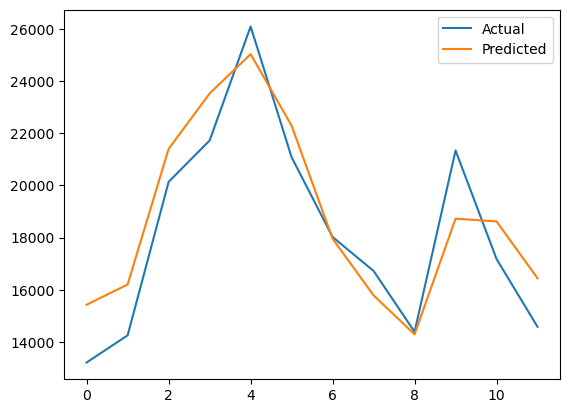

In [19]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()